In [4]:
!pip install transformers

In [5]:
!pip install sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification

#from transformers import XLNetTokenizer, XLNetForSequenceClassification
import tensorflow as tf


In [7]:
true= pd.read_csv('ta_true.csv')
fake= pd.read_csv('ta_fake.csv')

In [8]:
data= pd.concat([true,fake])

In [9]:
data = data.sample(frac=1).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [10]:
stop_words='''ஒரு
என்று
மற்றும்
இந்த
இது
என்ற
கொண்டு
என்பது
பல
ஆகும்
அல்லது
அவர்
நான்
உள்ள
அந்த
இவர்
என
முதல்
என்ன
இருந்து
சில
என்
போன்ற
வேண்டும்
வந்து
இதன்
அது
அவன்
தான்
பலரும்
என்னும்
மேலும்
பின்னர்
கொண்ட
இருக்கும்
தனது
உள்ளது
போது
என்றும்
அதன்
தன்
பிறகு
அவர்கள்
வரை
அவள்
நீ
ஆகிய
இருந்தது
உள்ளன
வந்த
இருந்த
மிகவும்
இங்கு
மீது
ஓர்
இவை
இந்தக்
பற்றி
வரும்
வேறு
இரு
இதில்
போல்
இப்போது
அவரது
மட்டும்
இந்தப்
எனும்
மேல்
பின்
சேர்ந்த
ஆகியோர்
எனக்கு
இன்னும்
அந்தப்
அன்று
ஒரே
மிக
அங்கு
பல்வேறு
விட்டு
பெரும்
அதை
பற்றிய
உன்
அதிக
அந்தக்
பேர்
இதனால்
அவை
அதே
ஏன்
முறை
யார்
என்பதை
எல்லாம்
மட்டுமே
இங்கே
அங்கே
இடம்
இடத்தில்
அதில்
நாம்
அதற்கு
எனவே
பிற
சிறு
மற்ற
விட
எந்த
எனவும்
எனப்படும்
எனினும்
அடுத்த
இதனை
இதை
கொள்ள
இந்தத்
இதற்கு
அதனால்
தவிர
போல
வரையில்
சற்று
எனக்'''

In [11]:
stopwords= stop_words.split()

# Add a comma after every word
stopwords_tamil =', '.join(stopwords)
stopwords_tamil = stopwords_tamil.split(', ')

In [12]:
def preprocess_text(text):


    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stopwords_tamil])


In [13]:
# Load XLNet tokenizer and model
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = TFXLNetForSequenceClassification.from_pretrained('xlnet-base-cased')

# Tokenize and convert to tensors
X_train_tokens = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=512)
X_test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=512)

# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train_tokens), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test_tokens), y_test))


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

In [14]:
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [15]:
# Set up training parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(train_dataset.shuffle(100).batch(8), epochs=3, batch_size=8)


Epoch 1/3


628/628 [==============================] - 214s 266ms/step - loss: 0.4381 - accuracy: 0.7982
Epoch 2/3
628/628 [==============================] - 168s 267ms/step - loss: 0.3715 - accuracy: 0.8396
Epoch 3/3
628/628 [==============================] - 167s 266ms/step - loss: 0.3544 - accuracy: 0.8521


158/158 [==============================] - 14s 71ms/step - loss: 0.3464 - accuracy: 0.8465
Test Loss: 0.3464
Test Accuracy: 84.65%


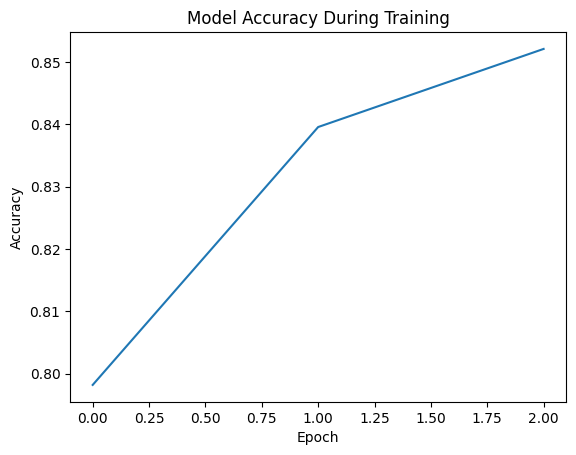

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset.batch(8))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot the training history (optional)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [20]:
import numpy as np

# Function to make predictions on the test dataset in batches
def predict_in_batches(model, test_dataset, batch_size=8):
    y_pred = []
    for batch in test_dataset.batch(batch_size):
        inputs, _ = batch
        predictions = model.predict(inputs)
        predictions_argmax = np.argmax(predictions['logits'], axis=1)  # Use the correct key for logits
        y_pred.extend(predictions_argmax)
    return y_pred

# Make predictions in batches
y_pred = predict_in_batches(model, test_dataset)



1/1 [==============================] - 0s 43ms/step


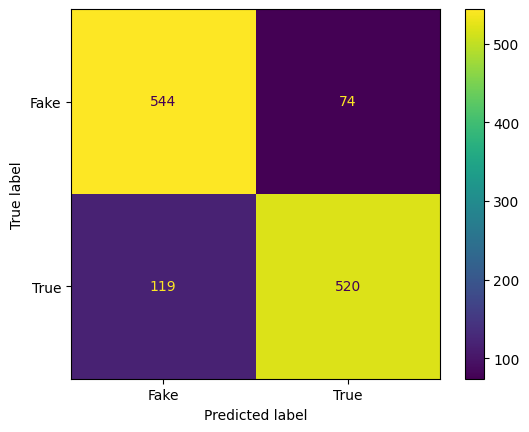

In [25]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake', 'True'])
disp.plot()
plt.show()


